In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/kaggle/input/aapl-2020-2025/AAPL.csv')

In [3]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2020-07-27 00:00:00+00:00,379.24,379.6200,373.92,374.840,30303548,92.167999,92.260352,90.875061,91.098652,121214192,0.0,1.0
1,AAPL,2020-07-28 00:00:00+00:00,373.01,378.1986,372.99,377.470,25906375,90.653901,91.914904,90.649040,91.737830,103625500,0.0,1.0
2,AAPL,2020-07-29 00:00:00+00:00,380.16,380.9200,374.85,375.000,22582314,92.391590,92.576295,91.101082,91.137537,90329256,0.0,1.0
3,AAPL,2020-07-30 00:00:00+00:00,384.76,385.1900,375.07,376.750,39532505,93.509543,93.614048,91.154549,91.562846,158130020,0.0,1.0
4,AAPL,2020-07-31 00:00:00+00:00,425.04,425.6600,403.30,411.535,93573867,103.298930,103.449611,98.015383,100.016764,374295468,0.0,1.0


In [4]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1249,AAPL,2025-07-17 00:00:00+00:00,210.02,211.80,209.5900,210.57,48068141,210.02,211.80,209.5900,210.57,48068141,0.0,1.0
1250,AAPL,2025-07-18 00:00:00+00:00,211.18,211.79,209.7045,210.87,48974591,211.18,211.79,209.7045,210.87,48974591,0.0,1.0
1251,AAPL,2025-07-21 00:00:00+00:00,212.48,215.78,211.6300,212.10,51377434,212.48,215.78,211.6300,212.10,51377434,0.0,1.0
1252,AAPL,2025-07-22 00:00:00+00:00,214.40,214.95,212.2301,213.14,46404072,214.40,214.95,212.2301,213.14,46404072,0.0,1.0
1253,AAPL,2025-07-23 00:00:00+00:00,214.15,215.15,212.4100,215.00,46989301,214.15,215.15,212.4100,215.00,46989301,0.0,1.0


In [5]:
df1=df.reset_index()['close']

In [6]:
df1

0       379.24
1       373.01
2       380.16
3       384.76
4       425.04
         ...  
1249    210.02
1250    211.18
1251    212.48
1252    214.40
1253    214.15
Name: close, Length: 1254, dtype: float64

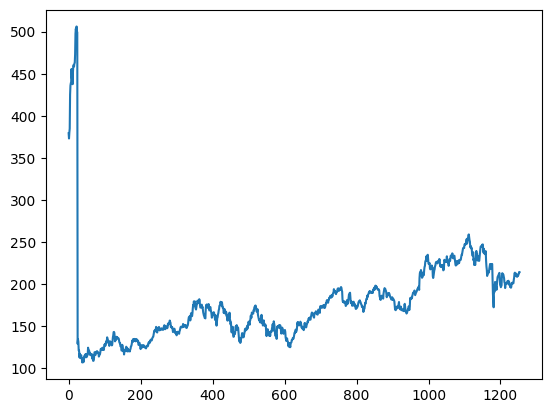

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
import numpy as np

In [9]:
df1

0       379.24
1       373.01
2       380.16
3       384.76
4       425.04
         ...  
1249    210.02
1250    211.18
1251    212.48
1252    214.40
1253    214.15
Name: close, Length: 1254, dtype: float64

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
print(df1)

[[0.68227927]
 [0.66667502]
 [0.68458359]
 ...
 [0.26459612]
 [0.26940513]
 [0.26877896]]


In [12]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(815, 439)

In [14]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [15]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(714, 100)
(714,)


(None, None)

In [17]:
print(X_test.shape), print(ytest.shape)

(338, 100)
(338,)


(None, None)

In [18]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [19]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2025-07-25 21:10:52.380179: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753477852.650956      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753477852.719161      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

2025-07-25 21:11:08.448085: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 232ms/step - loss: 0.0098 - val_loss: 0.0146
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - loss: 0.0015 - val_loss: 0.0035
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - loss: 8.9401e-04 - val_loss: 0.0045
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - loss: 5.1926e-04 - val_loss: 0.0012
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - loss: 3.3754e-04 - val_loss: 6.9159e-04
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - loss: 3.5293e-04 - val_loss: 6.5021e-04
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - loss: 3.3182e-04 - val_loss: 6.7145e-04
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - loss: 3.3711e-04 - val_loss: 6.3416e-04
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - loss: 2.9911e-04 - val_loss: 6.2873e-04
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - loss: 2.9849e-04 - val_loss: 5.9634e-04
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - loss: 2.9967e-04

In [23]:
import tensorflow as tf

In [24]:
tf.__version__

'2.18.0'

In [25]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [26]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

153.15868380899244

In [28]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

211.22324158705302

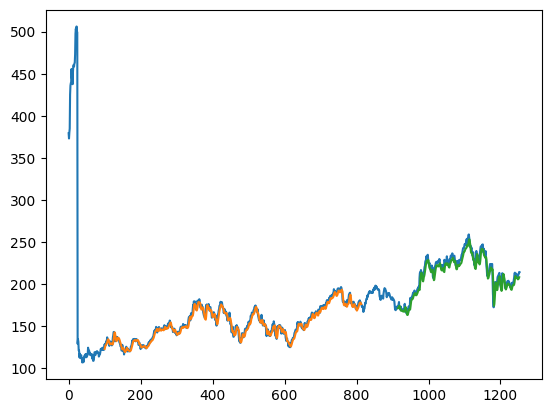

In [29]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [30]:
len(test_data)

439

In [31]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 98)

In [32]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [33]:
temp_input

[0.323331246086412,
 0.3228553537883531,
 0.3218284283030682,
 0.331195992485911,
 0.30216656230432054,
 0.28553537883531616,
 0.2758672510958045,
 0.2575829680651221,
 0.26712586098935504,
 0.26840325610519716,
 0.2651221039448966,
 0.2715090795241077,
 0.26865372573575447,
 0.27909830932999374,
 0.28525986224170313,
 0.29282404508453347,
 0.28726361928616145,
 0.2930745147150908,
 0.2781715716969317,
 0.2887664370695053,
 0.29142141515341263,
 0.29317470256731365,
 0.2413274890419536,
 0.20423293675641824,
 0.18690043832185343,
 0.16425798371947392,
 0.230457107075767,
 0.20934251721978703,
 0.22870381966186598,
 0.23964934251721975,
 0.23869755792110198,
 0.21898559799624295,
 0.2257733249843456,
 0.21620538509705695,
 0.23268628678772701,
 0.24485911083281148,
 0.25430181590482154,
 0.2565810895428929,
 0.25873512836568563,
 0.2614151534126487,
 0.2646462116468378,
 0.2667000626174076,
 0.2467376330619912,
 0.23055729492798988,
 0.2296055103318722,
 0.22394489668127737,
 0.22705072

In [34]:
from numpy import array
import numpy as np

lst_output = []
n_steps = 100
i = 0

while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[-n_steps:])  # take last 100 values
        print(f"{i} day input {x_input}")
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(f"{i} day output {yhat}")
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape((1, len(temp_input), 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)


3 day input [0.32285535 0.32182843 0.33119599 0.30216656 0.28553538 0.27586725
 0.25758297 0.26712586 0.26840326 0.2651221  0.27150908 0.26865373
 0.27909831 0.28525986 0.29282405 0.28726362 0.29307451 0.27817157
 0.28876644 0.29142142 0.2931747  0.24132749 0.20423294 0.18690044
 0.16425798 0.23045711 0.20934252 0.22870382 0.23964934 0.23869756
 0.2189856  0.22577332 0.21620539 0.23268629 0.24485911 0.25430182
 0.25658109 0.25873513 0.26141515 0.26464621 0.26670006 0.24673763
 0.23055729 0.22960551 0.2239449  0.22705072 0.2296556  0.26036318
 0.26572323 0.26422041 0.26201628 0.26154039 0.25532874 0.25051972
 0.23857232 0.23674389 0.22149029 0.23386349 0.23438948 0.23321227
 0.2354665  0.23759549 0.24152786 0.24040075 0.23491547 0.24315592
 0.23696932 0.24002505 0.23028178 0.23133375 0.22444584 0.22938009
 0.22241703 0.22477145 0.2358422  0.23709455 0.23408892 0.23724483
 0.2358422  0.23604258 0.24628679 0.25292423 0.26449593 0.26727614
 0.25825924 0.25840952 0.26123982 0.26442079 0.261

In [35]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [36]:
len(df1)

1254

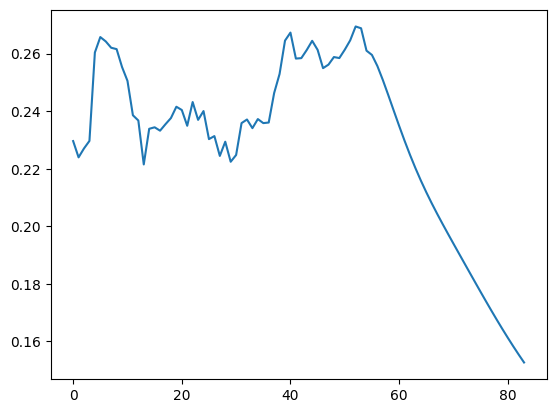

In [38]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [39]:
df3=scaler.inverse_transform(df3).tolist()

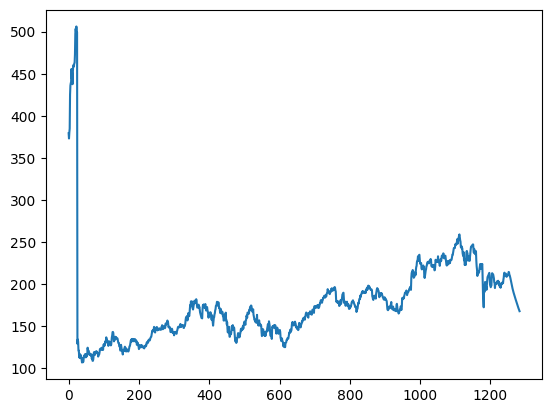

In [40]:
plt.plot(df3)